In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score
from sklearn import metrics
%matplotlib inline

In [3]:
df_train = pd.read_csv(r'C:/docs/Predictive/Nikhilweek4/Bank-Loan-Prediction-master\Bank_Personal_Loan_Modelling.csv')
df_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df_train.rename(columns = {'Personal Loan':'target'}, inplace = True) 
df_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,target,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Class 0: 4520
Class 1: 480
Proportion: 9.42 : 1


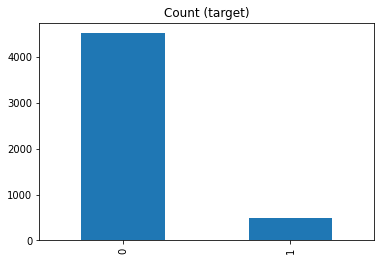

In [6]:
#checking imbalance of target
target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [7]:
#over sampling
count_class_0, count_class_1 = df_train.target.value_counts()

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

Random over-sampling:
1    4520
0    4520
Name: target, dtype: int64


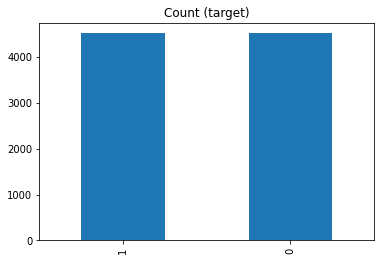

In [8]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [9]:
#Train test split
y=df_train[['target']]
x=df_train.drop(['target'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [10]:
#gradient boosting technique
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Poornima\Anaconda3_1\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.40%


In [21]:
#Random forest technique
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0,criterion='entropy',max_depth=50,n_estimators=100)
forest.fit(X_train, y_train)
score = forest.predict(X_test)
accuracy = accuracy_score(y_test, score)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Poornima\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 98.00%


In [14]:
#one hot encoding on education column
data= pd.get_dummies(df_train, columns=['Education'])

In [15]:
data.rename(columns={"Education_1":"Undergrad","Education_2":"grad","Education_3":"Advance"}, inplace=True)

In [16]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,target,Securities Account,CD Account,Online,CreditCard,Undergrad,grad,Advance
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [17]:
#Train test split
y=data[['target']]
x=data.drop(['target'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0,criterion='entropy',max_depth=50,n_estimators=100)
forest.fit(X_train, y_train)
score = forest.predict(X_test)
accuracy = accuracy_score(y_test, score)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Poornima\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 98.00%


In [19]:
#gradient boosting technique
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Poornima\Anaconda3_1\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.50%
